**영어/한국어 Word2Vec 실습**

In [1]:
import nltk
nltk.download('all',quiet = True)

True

영어 Word2Vec 만들기

1. 훈련 데이터 이해하기

In [2]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize,sent_tokenize

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f30144cded0>)

2. 훈련 데이터 전처리하기

In [4]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath('//content/text()'))
content_text = re.sub(r'\([^)]*\)', '', parse_text)
sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

result = [word_tokenize(sentence) for sentence in normalized_text]

In [5]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [6]:
for line in result[:3]:
  print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


3. Word2Vec 훈련시키기

In [7]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [8]:
model = Word2Vec(sentences = result,size = 100,window = 5,min_count = 5,workers = 4,sg = 0)

In [9]:
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8664247393608093), ('guy', 0.8059641122817993), ('lady', 0.7801610231399536), ('gentleman', 0.7649980783462524), ('boy', 0.7644624710083008), ('girl', 0.7523269653320312), ('kid', 0.7194689512252808), ('poet', 0.702926754951477), ('soldier', 0.6999073624610901), ('friend', 0.6694441437721252)]


4. Word2Vec 모델 저장하고 로드하기

In [10]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [11]:
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8664247393608093), ('guy', 0.8059641122817993), ('lady', 0.7801610231399536), ('gentleman', 0.7649980783462524), ('boy', 0.7644624710083008), ('girl', 0.7523269653320312), ('kid', 0.7194689512252808), ('poet', 0.702926754951477), ('soldier', 0.6999073624610901), ('friend', 0.6694441437721252)]


한국어 Word2Vec 만들기

In [12]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 43.0 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f2fed8dd5d0>)

In [15]:
train_data = pd.read_table('ratings.txt')

In [16]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [17]:
print(len(train_data))

200000


In [18]:
print(train_data.isnull().values.any())

True


In [19]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [20]:
print(len(train_data))

199992


In [21]:
train_data['document'] = train_data['document'].str.replace('^ㄱ-ㅎㅏ-ㅣ가-힣]','')

In [22]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [23]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [24]:
from tqdm import tqdm

In [25]:
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) 
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [15:21<00:00, 217.03it/s]


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


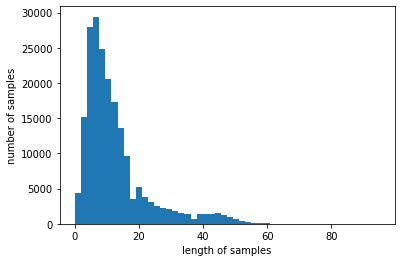

In [26]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [27]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data,size = 100,window = 5,min_count = 5,workers = 4,sg = 0)

In [28]:
model.wv.vectors.shape

(17615, 100)

In [29]:
print(model.wv.most_similar('최민식'))

[('한석규', 0.8725099563598633), ('엄정화', 0.8381481170654297), ('박중훈', 0.8277074098587036), ('설경구', 0.8229915499687195), ('안성기', 0.816495418548584), ('박신양', 0.8135545253753662), ('윤제문', 0.8108160495758057), ('문소리', 0.8069335222244263), ('혼신', 0.8059958815574646), ('김명민', 0.8052296042442322)]


In [30]:
print(model.wv.most_similar("히어로"))

[('호러', 0.8745296597480774), ('슬래셔', 0.8712435364723206), ('무협', 0.8583248853683472), ('sf', 0.8295889496803284), ('정통', 0.8248883485794067), ('느와르', 0.8184242248535156), ('무비', 0.8172463178634644), ('블록버스터', 0.8153418302536011), ('SF', 0.8062469959259033), ('물', 0.80585777759552)]


사전 훈련된 Word2Vec 임베딩 소개

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
! gzip -d /content/gdrive/MyDrive/자연어처리/GoogleNews-vectors-negative300.bin.gz

gzip: /content/gdrive/MyDrive/자연어처리/GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? y


In [34]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/자연어처리/GoogleNews-vectors-negative300.bin', binary=True)  

In [35]:
print(model.vectors.shape)

(3000000, 300)


In [36]:
print(model.similarity('this','is'))
print(model.similarity('post','book'))

0.40797037
0.057204384


In [37]:
print(model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

교안

In [38]:
corpus = [
'he is a king',
'she is a queen',
'he is a man',
'she is a woman',
'warsaw is poland capital',
'berlin is germany capital',
'paris is france capital',
]

def tokenize_corpus(corpus):
  tokens = [x.split() for x in corpus]
  return tokens

tokenized_corpus = tokenize_corpus(corpus)

In [40]:
tokenized_corpus

[['he', 'is', 'a', 'king'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['she', 'is', 'a', 'woman'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital']]

In [39]:
vocabulary = []

for sentence in tokenized_corpus:
  for token in sentence:
    if token not in vocabulary:
      vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [41]:
vocabulary_size

15

In [42]:
window_size = 2
idx_pairs = []

for sentence in tokenized_corpus: 
  indices = [word2idx[word] for word in sentence]
  
  for center_word_pos in range(len(indices)): 
    for w in range(-window_size, window_size + 1):
      context_word_pos = center_word_pos + w
      
      if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
        continue
      context_word_idx = indices[context_word_pos]
      idx_pairs.append((indices[center_word_pos], context_word_idx))

In [43]:
idx_pairs

[(0, 1),
 (0, 2),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 1),
 (3, 2),
 (4, 1),
 (4, 2),
 (1, 4),
 (1, 2),
 (1, 5),
 (2, 4),
 (2, 1),
 (2, 5),
 (5, 1),
 (5, 2),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 2),
 (1, 6),
 (2, 0),
 (2, 1),
 (2, 6),
 (6, 1),
 (6, 2),
 (4, 1),
 (4, 2),
 (1, 4),
 (1, 2),
 (1, 7),
 (2, 4),
 (2, 1),
 (2, 7),
 (7, 1),
 (7, 2),
 (8, 1),
 (8, 9),
 (1, 8),
 (1, 9),
 (1, 10),
 (9, 8),
 (9, 1),
 (9, 10),
 (10, 1),
 (10, 9),
 (11, 1),
 (11, 12),
 (1, 11),
 (1, 12),
 (1, 10),
 (12, 11),
 (12, 1),
 (12, 10),
 (10, 1),
 (10, 12),
 (13, 1),
 (13, 14),
 (1, 13),
 (1, 14),
 (1, 10),
 (14, 13),
 (14, 1),
 (14, 10),
 (10, 1),
 (10, 14)]

In [44]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from nltk.tokenize import word_tokenize

corpus = [ 'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?' ]

corpus = [list(word_tokenize(doc)) for doc in corpus]
corpus = [ TaggedDocument(words, ['d{}'.format(idx)])
          for idx, words in enumerate(corpus) ]
print(corpus)
model = Doc2Vec(corpus, vector_size=5, min_count=0)
print(model.docvecs[0])

[TaggedDocument(words=['This', 'is', 'the', 'first', 'document', '.'], tags=['d0']), TaggedDocument(words=['This', 'document', 'is', 'the', 'second', 'document', '.'], tags=['d1']), TaggedDocument(words=['And', 'this', 'is', 'the', 'third', 'one', '.'], tags=['d2']), TaggedDocument(words=['Is', 'this', 'the', 'first', 'document', '?'], tags=['d3'])]
[-0.0242123   0.04928742  0.05366874 -0.09422377 -0.07738334]
